In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19708\3672613758.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=df_scatter['count'][i],y=df_scatter['median_salary'][i],s=txt)


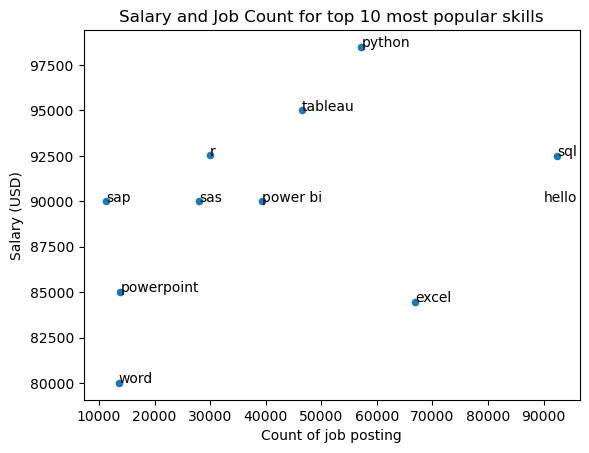

In [2]:
df=df[df['job_title_short']=="Data Analyst"]
df_exploded=df.explode('job_skills')
#Bài này cần aggregrate job_skills trên cả 2 tiêu chí: count và median salary associated. Nếu dùng các thông thường thì chỉ làm được một cái, nên mình sẽ dùng cách khác
skill_stat=df_exploded.groupby('job_skills').agg(
    count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
df_scatter=skill_stat.sort_values(by='count',ascending = False).head(10)
df_scatter.plot(kind='scatter',x='count',y='median_salary')
plt.title('Salary and Job Count for top 10 most popular skills')
plt.ylabel('Salary (USD)')
plt.xlabel('Count of job posting')
plt.text(x=90000,y=90000,s="hello")
for i,txt in enumerate(df_scatter.index):
   plt.text(x=df_scatter['count'][i],y=df_scatter['median_salary'][i],s=txt) 
plt.show()
 

